# Libraries

In [3]:
from PIL import Image
import os, sys
# import splitfolders
from os import listdir
from os.path import isfile, join
# import seaborn as sns
import cv2
import skimage
import numpy as np
import glob
import math
import pandas as pd

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten,MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical 
from keras.optimizers import SGD,Adam,RMSprop
from keras.models import load_model
from sklearn.metrics import confusion_matrix

import tensorflow as tf


from matplotlib import pyplot as plt

# Loading Numpy arrays 

In [150]:
X_train=np.load('/content/X_train.npy')
X_test=np.load('/content/X_test.npy')
X_validation=np.load('/content/X_val.npy')

Y_train=np.load('/content/Y_train.npy')
Y_test=np.load('/content/Y_test.npy')
Y_validation=np.load('/content/Y_val.npy')


# VV19 Pre trained model

In [4]:
from keras.applications import VGG19 
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)
#Defining the VGG Convolutional Neural Net
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (64,64,3), classes = Y_train.shape[1])

80142336/80134624 [==============================] - 1s 0us/step


In [5]:
for layer in base_model.layers:
    layer.trainable = False#This keep all the layer to be trained my model will not train them again and will save time

In [104]:
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 

In [105]:
#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=64))
model.add(Dense(1024,activation=('relu'),input_dim=64))

model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))#Dense(128,activation=('relu')))
model.add(Dropout(.2))
model.add(Dense(6,activation=('softmax'))) 

#Checking the final model summary
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_16 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_62 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_63 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_64 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)             

In [106]:
#Initializing the hyperparameters
batch_size= 100
# epochs=5
learn_rate=.001
# sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model
history=model.fit(X_train, Y_train, batch_size=16, epochs=35, validation_data=(X_validation, Y_validation))

In [ ]:
Testing Accuracy

In [120]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy*100)


6/6 [==============================] - 0s 14ms/step - loss: 0.9509 - accuracy: 0.8404
84.04255509376526


# Saving Model

In [121]:
model.save("/content/model_CNN_84.h5")

Loaded model from disk


# Loading the model

In [122]:
model_81 = load_model("/content/model_CNN_84.h5")

# Plotting Graphs Acc & Loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


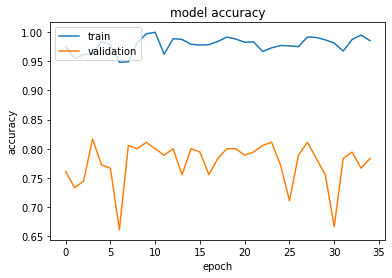

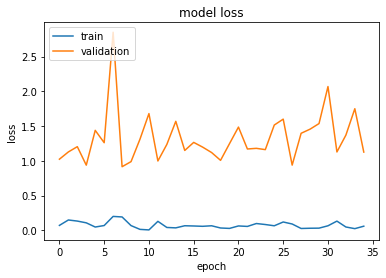

In [118]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [140]:
Y_pred=model.predict(X_test)

In [142]:
Y_pred = (Y_pred > 0.5) 

# Claasification Report

In [132]:
report=metrics.classification_report(Y_test, Y_pred,output_dict=True) 
df = pd.DataFrame(report)
display(df)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,micro avg,macro avg,weighted avg,samples avg
precision,0.711111,0.958333,0.851852,1.000000,0.903226,0.758621,0.847826,0.863857,0.854589,0.829787
recall,0.820513,1.000000,0.851852,0.965517,0.700000,0.733333,0.829787,0.845203,0.829787,0.829787
f1-score,0.761905,0.978723,0.851852,0.982456,0.788732,0.745763,0.838710,0.851572,0.838502,0.829787
support,39.000000,23.000000,27.000000,29.000000,40.000000,30.000000,188.000000,188.000000,188.000000,188.000000


In [153]:
Y_pred=model.predict(X_test)

In [154]:
Y_pred.shape

(188, 6)

# Confusion Matrix

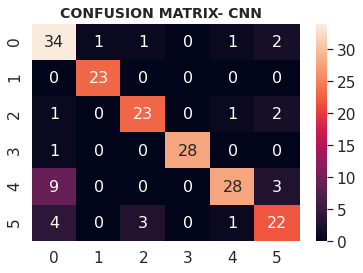

In [209]:
# confusion_matrix(Y_test, Y_pred)
cnn_cf=confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cnn_cf, annot=True, annot_kws={"size": 16}) # font size
plt.plot()
plt.title('CONFUSION MATRIX- CNN  ',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show(block=False)

# COmparision Bar Graph

Text(0.5, 1.0, 'Accuracy Comparision')

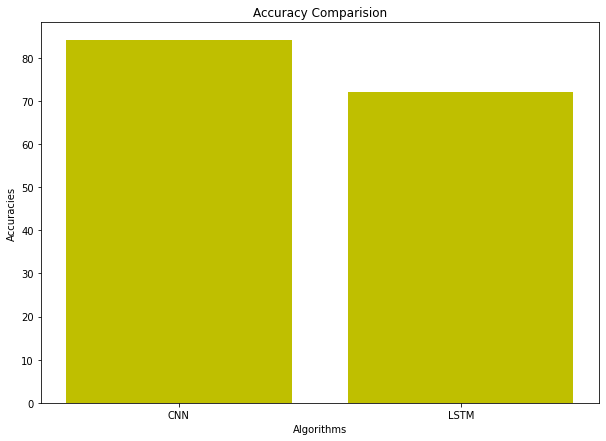

In [16]:
x=["CNN","LSTM"]
y=[84,72]

plt.figure(figsize=(10,7))
plt.bar(x,y,color="y")
plt.xlabel("Algorithms")
plt.ylabel("Accuracies")
plt.title("Accuracy Comparision")